# Example 2 - Mott-Schottky vs. Gouy-Chapman conditions

Space charge models typically consider dopant ions as either mobile or immobile. If the dopant ions are considered immobile, the model follows a Mott-Schottky approximation. If the dopant ions are considered mobile, the model follows a Gouy-Chapman approximation.

In [1]:
from pyscses.defect_species import DefectSpecies
from pyscses.set_of_sites import Set_of_Sites
from pyscses.constants import boltzmann_eV
from pyscses.calculation import Calculation, calculate_activation_energies
from pyscses.set_up_calculation import calculate_grid_offsets
from pyscses.grid import Grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boundary_conditions = 'dirichlet'
site_charges = False
systems = 'gouy-chapman'
core_models = False
site_models = 'continuum'

In [3]:
alpha = 0.0005

conv = 1e-8
grid_x_min = -2.0e-8
grid_x_max = +2.0e-8
bulk_x_min = -2.0e-8
bulk_x_max = -1.0e-8

dielectric = 1

index = 111

b = 5e-9
c = 5e-9

temp = [773.15]

In [4]:
valence = [ +1.0, -1.0 ]
site_labels = ['site_1', 'site_2']
defect_labels = ['defect_1', 'defect_2']
mole_fractions = [ [ 0.2, 0.2 ] ]
initial_guess = [ [ 0.2, 0.2 ] ]
mobilities = [ 1.0, 1.0 ]

**Example 1 - Gouy-Chapman**

```
systems = 'gouy-chapman'
```

The first approximation that can be applied is Gouy-Chapman conditions. This states that all defects in the system are mobile and able to redistribute over the system.

In [5]:
data = '../input_data/example_data_2_one_seg_energies.txt'

In [6]:
limits, laplacian_limits = calculate_grid_offsets( data, grid_x_min, grid_x_max, 'single' )

for m in mole_fractions:
    for t in temp:
    
        defect_species = { l : DefectSpecies( l, v, m, mob ) for l, v, m, mob in zip( defect_labels, valence, m, mobilities ) }

        all_sites = Set_of_Sites.set_of_sites_from_input_data( data, [grid_x_min, grid_x_max], defect_species, site_charges, core_models, t )
        if site_models == 'continuum':
            all_sites, limits = Set_of_Sites.form_continuum_sites( all_sites, grid_x_min, grid_x_max, 1000, b, c, defect_species, laplacian_limits, site_labels, defect_labels )
        if systems == 'mott-schottky':
            for site in all_sites.subset( 'site_2' ):
                site.defect_with_label('defect_2').fixed = True
        if systems == 'gouy-chapman':
            for site in all_sites.subset( 'site_2' ):
                site.defect_with_label('defect_2').fixed = False
        grid = Grid.grid_from_set_of_sites( all_sites, limits, laplacian_limits, b, c )
        
        c_o = Calculation( grid, bulk_x_min, bulk_x_max, alpha, conv, dielectric, t, boundary_conditions )
        c_o.form_subgrids( site_labels )
        if systems == 'gouy-chapman':
            c_o.mole_fraction_correction( m, systems, initial_guess )
        c_o.solve(systems)
        c_o.mole_fractions()
        c_o.calculate_resistivity_ratio( 'positive', 2e-2 )

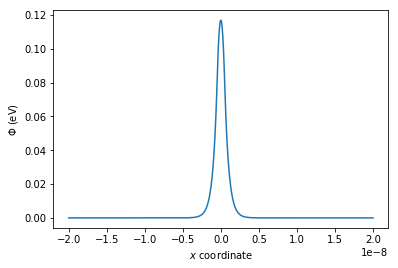

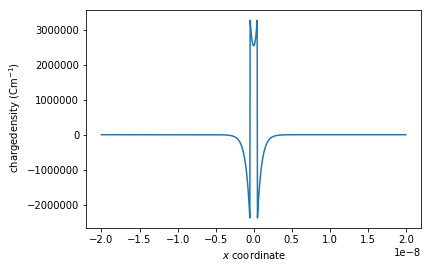

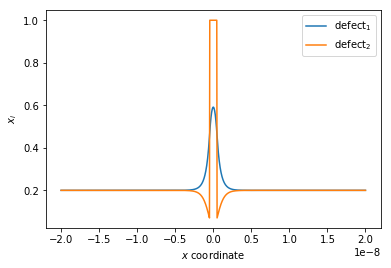

In [7]:
plt.plot(grid.x, c_o.phi)
plt.xlabel( '$x$ $\mathrm{coordinate}$' )
plt.ylabel('$\Phi$ $\mathrm{( eV )}$')
plt.show()

plt.plot(grid.x, c_o.rho)
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel(' $\mathrm{charge density}$ $(\mathrm{C m}^{-1})$')
plt.show()

plt.plot(grid.x, c_o.mf[site_labels[1]], label = '$\mathrm{defect_1}$')
plt.plot(grid.x, c_o.mf[site_labels[0]], label = '$\mathrm{defect_2}$')
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel('$x_{i}$')
plt.legend()
plt.show()

**Example 2 - Mott-Schottky**

```
systems = 'mott-schottky'
```

The second approximation that can be applied is Mott-Schottky conditions. This states that one or more of the defects in the system are immobile and not able to redistibute over the system. For the calculation, these defect species are fixed to their bulk mole fractions. 

```
for site in all_sites.subset( 'site_2' ):
        site.defect_with_label('defect_2').fixed = True
``` 

In [8]:
systems = 'mott-schottky'

limits, laplacian_limits = calculate_grid_offsets( data, grid_x_min, grid_x_max, 'single' )

for m in mole_fractions:
    for t in temp:
    
        defect_species = { l : DefectSpecies( l, v, m, mob ) for l, v, m, mob in zip( defect_labels, valence, m, mobilities ) }

        all_sites = Set_of_Sites.set_of_sites_from_input_data( data, [grid_x_min, grid_x_max], defect_species, site_charges, core_models, t )
        if site_models == 'continuum':
            all_sites, limits = Set_of_Sites.form_continuum_sites( all_sites, grid_x_min, grid_x_max, 1000, b, c, defect_species, laplacian_limits, site_labels, defect_labels )
        if systems == 'mott-schottky':
            for site in all_sites.subset( 'site_2' ):
                site.defect_with_label('defect_2').fixed = True
        if systems == 'gouy-chapman':
            for site in all_sites.subset( 'site_2' ):
                site.defect_with_label('defect_2').fixed = False
        grid = Grid.grid_from_set_of_sites( all_sites, limits, laplacian_limits, b, c )
        
        c_o = Calculation( grid, bulk_x_min, bulk_x_max, alpha, conv, dielectric, t, boundary_conditions )
        c_o.form_subgrids( site_labels )
        if systems == 'gouy-chapman':
            c_o.mole_fraction_correction( m, systems, initial_guess )
        c_o.solve(systems)
        c_o.mole_fractions()
        c_o.calculate_resistivity_ratio( 'positive', 2e-2 )

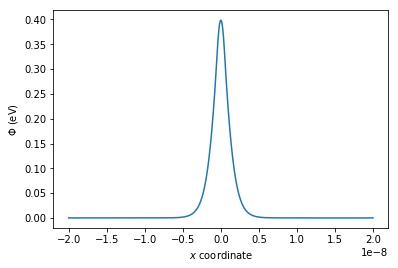

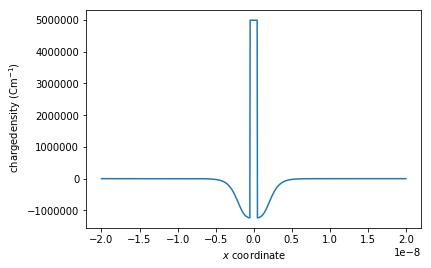

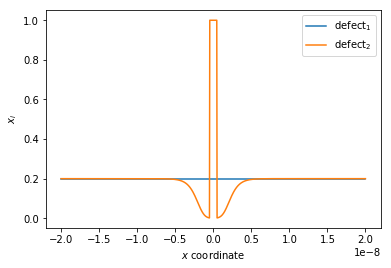

In [9]:
plt.plot(grid.x, c_o.phi)
plt.xlabel( '$x$ $\mathrm{coordinate}$' )
plt.ylabel('$\Phi$ $\mathrm{( eV )}$')
plt.show()

plt.plot(grid.x, c_o.rho)
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel(' $\mathrm{charge density}$ $(\mathrm{C m}^{-1})$')
plt.show()

plt.plot(grid.x, c_o.mf[site_labels[1]], label = '$\mathrm{defect_1}$')
plt.plot(grid.x, c_o.mf[site_labels[0]], label = '$\mathrm{defect_2}$')
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel('$x_{i}$')
plt.legend()
plt.show()

It can be seen in the figures above that when ```fixed = True ``` and the Poisson-Boltzmann equation is being calculated under Mott-schottky conditions ```defect_1``` is able to redistribute whilst ``` defect_2 ``` is fixed to its bulk value. As the negatively charged ```defect_2``` are fixed to its bulk positions they are not electrostatically attracted to the positively charged grain boundary core caused by the segregation of the positively charged ```defect_1```. This causes a larger electrostatic potential at the grain boundary core as the segregation is not limited by the repulsion of the negatively charged defects adjacent to the core and also a broader potential profile as the negatively charged defects are not shielding the positive potential.